In [15]:
require 'csv'
require 'date'
require 'iruby'
require 'base64'
require 'gruff'
require 'daru'

# Helper to display a Gruff-generated RMagick image inline in Jupyter

def hacky_render(gruff_obj)
  # Gruff::Base subclasses have #to_image which returns an RMagick::Image
  png_data = gruff_obj.to_image.to_blob
  encoded = Base64.strict_encode64(png_data)
  IRuby.html("<img src='data:image/png;base64,#{encoded}' alt='Chart' />")
end

# Loads up data generated with `bin/generate_kev_context_csv.rb`

def load_rows(path = "./kev_flat.csv")
  rows = CSV.read(path, headers: true)

  rows.each do |r|
    # dates
    r["date_generated"]   = DateTime.parse(r["date_generated"]) rescue nil
    r["kev_date_added"]   = Date.parse(r["kev_date_added"]) rescue nil
    r["kev_date_due"]     = Date.parse(r["kev_date_due"]) rescue nil

    # CVSS
    r["cvss_base_score"]  = r["cvss_base_score"]&.to_f

    # EPSS
    r["epss_today"]      = r["epss_today"]&.to_f
    r["epss_percentile"] = r["epss_percentile"]&.to_f
    r["epss_delta"]      = r["epss_delta"]&.to_f

    # integers
    r["attck_technique_count"] = r["attck_technique_count"]&.to_i
    r["metasploit_module_count"] = r["metasploit_module_count"]&.to_i
    r["nuclei_template_count"] = r["nuclei_template_count"]&.to_i
  end

  rows
end

rows = load_rows
puts "Rows loaded: #{rows.size}"
[rows.headers,rows.find {|r| r['cve_id'] == 'CVE-2021-44228'}]

Rows loaded: 1483


[["cve_id", "schema_version", "date_generated", "kev_vulnerability_name", "kev_date_added", "kev_day_added", "kev_date_due", "kev_days_allotted", "kev_short_deadline", "kev_ransomware", "cvss_version", "cvss_attack_vector", "cvss_attack_complexity", "cvss_privileges_required", "cvss_scope", "cvss_user_interaction", "cvss_confidentiality_impact", "cvss_integrity_impact", "cvss_availability_impact", "cvss_vector_string", "cvss_base_score", "cvss_base_severity", "ssvc_exploitation", "ssvc_automatable", "ssvc_technical_impact", "epss_today", "epss_percentile", "epss_delta", "attck_technique_count", "attck_capability_groups", "has_metasploit", "metasploit_module_count", "min_metasploit_delta", "has_nuclei", "nuclei_template_count", "min_nuclei_delta"], #<CSV::Row "cve_id":"CVE-2021-44228" "schema_version":"1.0.0-dev" "date_generated":#<DateTime: 2025-12-29T18:06:40+00:00 ((2461039j,65200s,267000000n),+0s,2299161j)> "kev_vulnerability_name":"Apache Log4j2 Remote Code Execution" "kev_date_add

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAlgAAAHCEAYAAABj42snAAAAIGNIUk0AAHomAACAhAAA+gAAAIDoAAB1MAAA6mAAADqYAAAXcJy6UTwAAAAGYktHRP///////wlY99wAAIAASURBVHja7N1lQBVLG8Dx/9KNAgqiAiIKgoKKgd0idnd3d3d3d3ci2N3XwMTAQjExsRVEQOL9AFzwBRs9eH1+X5Qze2Zm5+zO2Z0z86yCgoISE4MQQgghhBBCCCGEEKmQBo7Y46rqagghhBBCCCGEEEIIkTwNHHGQASwhhBBCCCGEEEIIkVrFDmDlU3U1hBBCCCGEEEIIIYRIngZOMgNLCCGEEEIIIYQQQqReClc4pahJEHchhBBCCCGEEEIIkTopRPNGyS8DWEIIIYQQQgghhBAiddJQHBVZQiiEEEIIIYQQQgghUq3YGFgSxF0IIYQQQgghhBBCpFKxTyGUGVhCCCGEEEIIIYQQIpXSwBEHRWZgCSGEEEIIIYQQQohUSmZgCSGEEEIIIYQQQohULTYGlgxgCSGEEEIIIYQQQohUKvYphLKEUAghhBBCCCGEEEKkUrKEUAghhBBCCCGEEEKkahLEXQghhBBCCCGEEEKkahIDSwghhBBCCCGEEEKkarKEUAghhBBCCCGEEEKkarEDWLKEUAghhBBCCCGEEEKkUop6VrUw9UsxMaquiBBCCCGEEEIIIYQQyVHUq6rbaGjKAJYQQoi/k8Upc1/z3fAw6JHJwzJJ0/et3jd/33WouLHihEouf365qvK793fcibG3x7aCPi/6qvWZlzS90vpK4yo7wd51exfuDVB16wjxZ3CZ4bLApSv0Cu6l22s5lOhaYkDxUmB+1vyC+T4IyRiSISQbLHq58Oai/DCgyMCsA5eoutbid5F+Vwjxq0kMLCH+Yu5V3Bu5m8POwjsb79iSNH3T+U2HNhtA3Y11J9XN9fX8bL2ybMsyE87ha3+uLRgFGN0xupB0O5+ZPuN8DkPp26X3lukCZeqVaV3G7vP1SCmzzGbGzGoHuaY4z83VCUo2K9mppHPS7Va+WHlzlSu0nNKyW0ut7y9H54XOK53H8HzH83vPFNB9ohukey/pdu1GtGvd7j0sCVvyaGnZX7ffqqIZovle8w08Ovro1UMzMLlkcsXkWEJ6tHa0drQeWBWw0re6D0+LPi0YVFUFFX2l2BF7HLxKNt0AfYwhxb8vVVWuqvzu/fVXTLEA4HWy6VZkJltceUaqbpzf72v9fxJqqKEO77K+s3nnDAGNA+oE9INDaw8tPHQDFn9c9HSxO9yud6f6nR6q3juR0mq51CpR6w2sybmmxurFoBGi8V7jDXCY44m3S0Ma0gDW/janbDIAK37sfO78trNWp2Uwfe70rdMdkqaPKDnCYcQKGFVoVJbR8z+fjxKtRCtR8GLrizvPo8HY3zjA+FxC+vd+3197ei3N1XKQfVn2ddlHJk23cLfIaBEGL/K+cH5Z6td/LqmO9LtCiF9MBrCE+JtZkxndL6QbYUhavnpDqfVG663WC1jXZv3odU/BqG/yA1fPCz8v8LwyNLBtEN7wOES6R5aObPwN9UgpJkpa0sPG1xtbeuWHkpSkZHjSzTyqejSukAGUdkohJTPEqMWoxah/ezElSpeoXqIo6C7SLaE7KWl6lH6UXpQRbGm7xW1rZiAvLvwHL3Td87mXcQ8Dk1kmlU0WJ01XC1cLVwuF+v3rN67/FKY7Tk83QxXfR895qcTP+HmcTLoB+hiR8gNJqipXVX73/h4lIO5GKnnWiW6kMqm6cVTge/vdaKKJAiOMMAJcccUVcB3mOsEV6KnfU6+nEYy9PjbX2LUwssZIt1E7v7//FKmL8Q3jAGNfWDR80ZKF+okGrr4iKn1UuqhM/PD5fLbbmQFnrwNzgWQGsJwXOK9wGQCcYT01P59Pjhk5Fjh0B2N/41Bju6TphQYUGuVWHSiOA0Gfz0f3qe4z3ftgN83Oy24ysAxINIB1r969Gvd6wIvGL+q+/Bj34n+h3/5e0u8KIX4xDZwkiLsQfyvFikxEAFGf2SB+AOsr/cSEjhPGjw8B11Oud12rJE2P0YrRjNGGxvqNHjVeA49mP9r8qPZ31COlmJAWc9jM5lebPWCWziydmfqgFqYWpvY+YbN0PunOpNsB+dzyGbvehbNzz04898+3F1OpUqUGFYOAi8nepnNo3yHvQ2/hpe7LwJcrfvE+q1CjjI1yNlrwDdula5S90XmY7jTdfIYqvo+eEMStL6QboK8YEXseLP0PlKsqv3t/zThB2s8nK1ZkIhtwFgd+YKblny6l+1319+qh6u9gCEMYArjccTmfuxPUu1/vUL1u8NH4o+FHE1Xvtfhe7gXcy7l/AKPRRhWNklkKGFQ2qERQPRg4aGDzQc8hoFNAq5uTIMQ2xDrkGDCS/qz//nIvrr+05NJ1+Jj244SP7UDzteYbzWcJ6S4TXGY6twE6U5wsn8/HbZTblEKN4/44lTQ926Jsq7INAdP5pu1MG8HLAi/zviyXdLucc3IudeoFamFq4WrJlHd6xenZZy4A19hB89/28aQ+0u8KIX4xmYElxN/Misy8+EK64ZdnYFUzq5q96iXoEtKlXZfOn89m2Khh7YeFwMFuh64f8gf+//fUr9TjlOeppacCYHKzSeUnn/jx3b3d4Y7dnZnwrP2zFs+84Wjeo7WPesbNxEpme49yHrU8DOCs41mHc9/RT3rk9yjrseXz6V66XqHetePadfiP709qZXjD8JbheaiSo0qhys+ARzz50vZ5euUZmqci5Biao3qOAnB94PUe139nzJRAHnP9C+nxS9vsUvj7UlXlqsrv3l8zTAn9QnripSxmqm4cFfjOfleJUqKUSEh3OP2x9F5QNm/ZUmU/QE2DmlY1TgBRRBGZ8P6qtlXzVrkPQ6cPHTvEH4ZMHNJl6Mev1kqkMrbzbLfatgLsqUgy/fLYnmPrjbsNKwqtsF2xDDjP4X8T42Mc/cD5HE444a5wacqlUZfKQz7yffI7mu0K2/W2Y8Cwm2FpwyUQbB9sF5w3aT6FGhSq4VYW8KDDl8orNMRtvFtt2PFgp9/OZGZqOc91XurSO+4P76TpZzefXX32PlADt/9Ef/2jpN8VQvxiGoojDorMwBLi72StZOY2QPIT5xUjDEkDSuZP+4nMK63WZx4LS3Is7bFkDwDnaZz0/buDdvvvcYLxc8cNmHAdlAWoK5rfX48njR7XftIbtmbe+mHbnp/Y3y2sBlC2gJIPvHZ5+XrXixvAWpl084qOFQtVfA6jHEc6jP6GftJ+pMMk+6aQZVGWlVkWJU2PMowyiEoDW25sWbPFE/6r/W9Nv5rGNQeDziOdJzq3v/19jdQamTXcDUMcBzsMtfyNFd5JIMu+kK4fu7RNccQyRT8vVZWrKr97f2tjys0vpFsrmckGiiN+SlZVN44KfH+/G9t7N6EcwCIWsggoV6Z8hrJPYXOGzeabbUD7iXaQ9r2EfPot6rezXz7YYraFrTnh/HLfOecvIP4Q2l20t2lHfz49qPXTpk+HgaLD+1/RT511Odv/7AbI1zJfl3yJ848bMM3VOVfJXJng5C6fDSefJ32/W0u3Dm6rvl6OW6dCfdyKw07HnWN2JfP945LXpZazN+BFreTef+bEmd1nPoIyiOb/if76R0m/K4T4xTRwVP4bv+wKIb6fCbZK/C+NYcmk/xsDS7HGFTSCNUI0XsPa8LWea9pAmrNpzqfplfRtge0CmwWOhuaezQY1OwYxRXCKqQygpEg9Uspmh817Nw+EmXozdWcYglqo2ge14IT0fI3ztc/nDOlJnzfdDXjm8bzs8yafz8/DxWOFx9vPpx+8c/DCoczwqsWrAq+GA47KF3+ZztMoT9s8OaHL7C7enXNBcZfiJYq/hwzeGbZnmAtRelG6UQYQ2CqwceBwOOJ/5NQRU5jdYXb1ORfAf5z/UP9NKdde36r
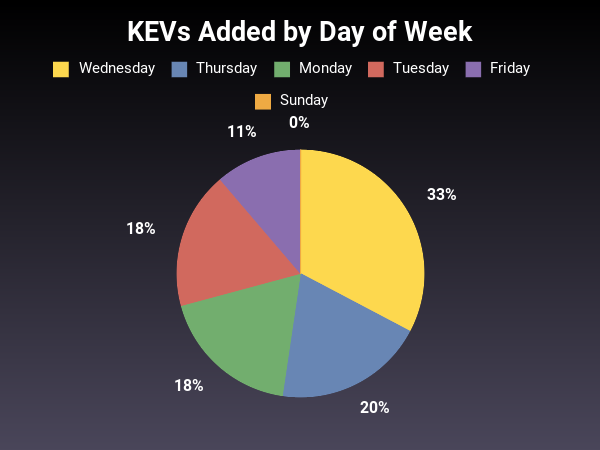

In [16]:
# Pie chart for KEVs added by times of day, just using CVS parsing and Gruff.

def plot_kev_days_pie(csv_path = './kev-flat.csv')
  rows = CSV.read(csv_path, headers: true)

  day_counts = Hash.new(0)
  rows.each do |r|
    day = r['kev_day_added']
    day_counts[day] += 1 if day && !day.empty?
  end

  weekday_order = %w[Sunday Monday Tuesday Wednesday Thursday Friday Saturday]
  sorted_days = day_counts.sort_by { |day, _| weekday_order.index(day) }

  g = Gruff::Pie.new(600)
  g.title = "KEVs Added by Day of Week"
  sorted_days.each { |day, count| g.data(day, count) }

  hacky_render(g)
end

# Example usage:
plot_kev_days_pie("kev_flat.csv")


Counts by bucket: {"< 7 days"=>16, "7-13 days"=>24, "14-20 days"=>199, "21 days"=>980, "22-30 days"=>2, "31-60 days"=>5, "90+ days"=>257}


"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAyAAAAJYEAYAAADK5l4zAAAAIGNIUk0AAHomAACAhAAA+gAAAIDoAAB1MAAA6mAAADqYAAAXcJy6UTwAAAAGYktHRP///////wlY99wAAIAASURBVHja7N13fBTF/8fx9yZHAknohJrcHRIIItIRkCIdAiJFkA4CiqAiSBVFOiKI0kGaShEpCVWKoCAg0ntv0ntvoaX8/sgF+H3hkgsJXHK8no8HD+5ys7Of25293dnZmTFkyJARGSkAAAAAAAAAAAAXYZJF/srl7DAAAAAAAAAAAAASjklWmRXo7DAAAAAAAAAAAAASTlQDCD1AAAAAAAAAAACACzHJQg8QAAAAAAAAAADgWugBAgAAAAAAAAAAXA5zgAAAAAAAAAAAAJdj6D/tNFJFRjo7EAAAAAAAAAAAgIRiKELXjKI0gAAAAAAAAAAAANdhMqwGc4AAAAAAAAAAAACXYpKFOUAAAAAAAAAAAIBrYRJ0AAAAAAAAAADgcqIaQBgCCwAAAAAAAAAAuBB6gAAAAAAAAAAAAJdjkkVmgx4gAAAAAAAAAADAhdADBAAAAAAAAAAAuBzmAAEAAAAAAAAAAC7HZFjoAQIAAAAAAAAAAFyLSVaDHiAAAAAAAAAAAMClMAcIAAAAAAAAAABwOSZZZDZoAAEAAAAAAAAAAC6ESdABAAAAAAAAAIDLYQgsAAAAAAAAAADgcugBAgAAAAAAAAAAXI5JFnqAAAAAAAAAAAAA12Iy6AECAAAAAAAAAABcjOFewt3H/WJkpLMDAQAAQMLyOe191ueIdO34dZ9rxRxIn9s73Ge3dDfdvTR3Mzs7egB4dv+W+/eDfxdJbwx4Y+gbze2ne3fgu23qGtL8hfN/nXfxxeUHJKSNxTc22ThLKvRDobGFPrafruawmp/XSiktmrVo4u9HnR01AAAvhkkWmQ16gAAAALged8NfhyRJVx1Kbzb8lUtSepkNGkAAJGWe8tSPDqTLKF9lk2KtFyd0fkBC8pCHvnMgHeUTAPASipoEnTlAAAAvicXFFjdaFCJVrlW5aeWs9tONzDAicuRH0ucfdqzWcWfc1+O72Xd7hj+lLRFbcm5pKWX9K+vqrDNjX65P2T65+0yW+pXol73/YzdaHI37efuk2yeNPjknvV3u7Vpve0pBVYPeC0ob+3I5AwPCc26VjtY59vaxTxIunh/7/vjzj6mkD5J9kLnVH7GnL3+k/NIK7aTVE1cPX73ZedvxhXGTu5HT9vqKA+kt8jdySsqgdFwfxl98j9swnzDvsDTStdzXcl4rIh1qcqjeoS+kDd9t6LNhkRSyNWTFHB9p3bB1A9b96exvC0T5Zv43GwdUl7ru7Xq5aw/76ZYuWvrb0kvS2/+8PaVGjecQiKc8lNyBdL7KoKySrDLL/QXmByQkDwfLZ3QDiFVmOXD9BgCAK4hqAKHlHwDwskih5PJyIF1KI6XSSrKqcVzOk2733R643Zemtp/adOptKevbWRs50vCx6N9FSxYbUv/3+pce0FiSu9z+33odjft5S690yiTNvDLzyKxcUpCCFHQo9sWCGldrExQojck0xjw2Aa87gt4JalJVkpYoxtu/ZyuefetsA+mfmv/k+MeQXqLrH0MRcUhtkb9ySvJVemVzduguIJ7HremW6bbpmpRBGZRBj/4v0aHEVyUqSh3UQR0kbcqwqcSmN6WuH3et2W2ftGbKmjFrdjj7y+NlE33+a/RKo8KN/os9feV3K79f2SxlrpM5V2aTdO6tc2+eq52AAYXKM843hFO9wPwSOZ9jPid99kvXBl5bfHWDA+n7+9RNWVG663s3/V0Hzh/PO/+XziUHG0AyPVY+DWcHDQDAi2GShR4gAICXSAqlkLcD6VIpqgHEErcbGD1/6bns6+JSxXYVf6qYMfb0R1oeaXykl9T8teZuzd+WIl+LzB2ZJx5xP2/plM7IJC24tODQgjLSvYz3MtzzkzwveF7yPGV/saCqQe9VSyuNuTJm49je8Q8jf+/8g/I1krKtz3YjmzX29MEXgw8GF5QickZUjgh39kZ8gSIlxeX7WhQ1BJavMsjP2cG7gBd03BbtVLRn0SBppftK9xU1pEFVBuUfNEPq8WmPWl/vlSLdIt0jTc7eGHB15YLK1i+bXvKL9Avw+yj29G533e65hUqNejZq2fCq9IPlB/PQsQkY0H/yUAoH0mWUr7Iq6nyf7QXml9g97/MH56eEdUNh8nQg3WNDYCmls4MGAODFYAgsAMDL5aaSG9E3JO/HkC6VUiqNop6QyxB7tpWLV6pSKVz6KvSr3l8F2f54z376O/53st7JKdUtWTddvRPSterXul2bngBxP2+2HiA3St3IeaOhtKTeks5L90m1VEs1Y1isXK1yTctmk1JMS9EpRTLpTtY7me+88uxhVKtYrU61ONxYnpliZujMeoran9ucuP1etAhFxKm8mG09QDLJV2ZnB+8CXvRxG65whUnd1E3dJKXPkT5V+i+kNovajG5b1NkbA66uqXdT/6ZzbG8caACJ1sytmW+zJdIP1h/MQxOyXnpaVx3ssRE1ZNX9WOrFCZ1fYve8zx+cnxLWQZ2Kcw+lLM4OGgCAF4MhsAAAL5fDco9TD5BYzpN+wX4L/UZLU/NOGzX1tGT8Yzww7sWe/Qd7Pvj9wybSLo9dN3fVSbi4V65duXhluBQcHnwxpErCb741m9f8tSaZpCB1Vi5pVvis+7Maxd4AkvxM8nPJj0rlspW9VXaJtPjIki1L4vEEZ1CRoApBd2NPd7z58QbHv5LW/71+wYYGtj++TNc9YQqXA9vpoeghsDIroyzODt4FxPO4TX4u+YXkx6WsC7MuzTJRKl+8fJXykVLBTwp2LVg29nw/OPLBjQ++lXYt3jVmdxFpdPnRr43+2dkbBa7G+6j3Ce+9Uu3MdXLX3iVJOhqX5fP2zjsobyOpQNsCpQpkk7YP3T5g+9IECGyzbjuSzPC13RC+Gku9OKHzS+ye9/mD81PC8tAFXY89mRHdAHJSZgU4O2gAAF4Mk8EQWACAl8laXXFoTH5bA4i982Sy68luJLskzZg5o8BvX0np/0k/JL1/7NkObz688vA10qylM8fN7C4ZcnAKSgfj3j1q9+DdK6TxK8b9PG7xc9mCZSTJmBj15vfjv5/8vYYU+kqoNTSv5PWf1zGv3fYXDipYrWzQLWmJZcnsJc9w/ZF2Q7rN6ZZKxRsWb128kaQ7aqpb9tPPSjcrctb7tv34Mt4wOaQHuhOH9LYhRozMyiSrs4N3AQl33NaVJC2LelMxuFLmimekyR6T80zuKmX8I+OKjNPs5z/w04GDv7krLZiw4JMFC6VTjU7WPdnZ2RsHrqL2sdrpav8ueR/2Puq989nzaXazmWfTadIOy3bz9oSon47SfzruQDpbjw3Dogcx1osTOr/E7nmfPzg/JayB2ilHjr9Mhq+ySYZFh5J0+QQAIA5MsspsJOUnUwAAiIsUCnWoB0jKRz1AnnaeHJR/cK1BwVLxmsUXFi8Se3arN63+a00y6YtN3WZ395ZklY+R5sXHndDuvBVqviNp0Z1FpxdVleqpnurFkD7IEpQ/6D9JF58tvqpFq6Sp8p3kdsftjtut2NPPfG1mxlk9bdtjnePrcb/jfsf9llTD9E7Gt/+S6l2oF1FvglSkXpEWRXJKmRdmXpp5kpTsarLryS5K14pcK3CtvHSg54EuB6ZIa9avWbZG0i8lfskxeYT03+dH2v43/Pnvj/9lmHVfWyVdczi9v3JKOafnmp6rv9T5m86TO2WTKmavWLDiiUff+8brN/LceFPa32f/F/unS8HpgiND3pcmVptQaOJ06V7Ge773YmgQXNd5/ZR//7RtzxieQJ2dZXay2W2kRuaGdxvH4YnwkZZR5UaMldrMarO6TZD9dIe+OtTx0CQpz5+vfvdav+ewA57Tcftn6PLTf0mq2L5i30p
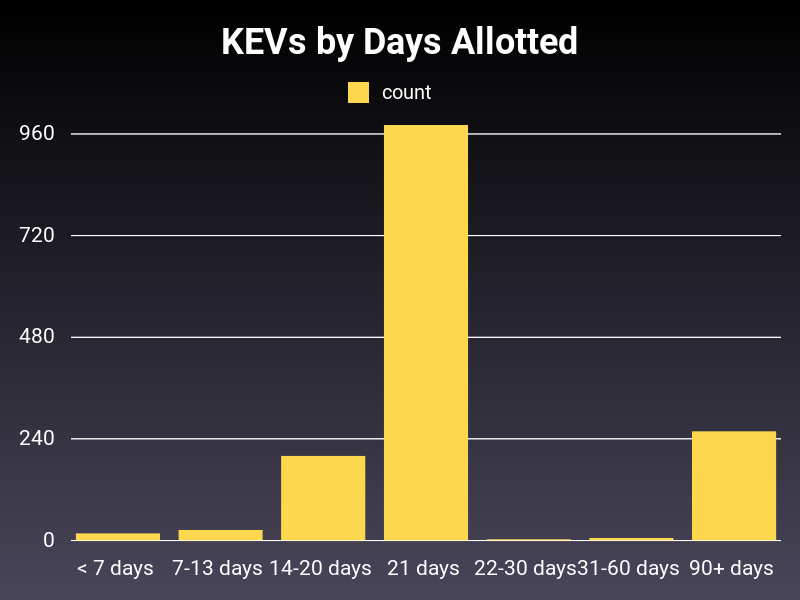

In [11]:
require 'csv'
require 'gruff'

def plot_kev_days_allotted(csv_path = './kev_flat.csv')
  rows = CSV.read(csv_path, headers: true)

  # Define your buckets as [label, range]
  buckets = [
    ["< 7 days", 0..6],
    ["7-13 days", 7..13],
    ["14-20 days", 14..20],
    ["21 days", 21..21],
    ["22-30 days", 22..30],
    ["31-60 days", 31..60],
    ["90+ days", 90..Float::INFINITY]
  ]

  # Initialize counts
  counts = Hash[buckets.map { |label, _| [label, 0] }]

  # Tally each row into the appropriate bucket
  rows.each do |r|
    days = r['kev_days_allotted']&.to_i
    next if days.nil?
    bucket_label = buckets.find { |_, range| range.include?(days) }&.first
    counts[bucket_label] += 1 if bucket_label
  end

  puts "Counts by bucket: #{counts}"

  # Create the bar chart
  g = Gruff::Bar.new(800)
  g.title = "KEVs by Days Allotted"

  # Gruff wants arrays: one per dataset. We'll have a single dataset
  labels = counts.keys.each_with_index.map { |k, i| [i, k] }.to_h
  g.labels = labels
  g.data(:count, counts.values)

  hacky_render(g)
end

# Example usage
plot_kev_days_allotted("kev_flat.csv")


In [20]:
require 'daru'
require 'csv'

# Load CSV into a Daru DataFrame
df = Daru::DataFrame.from_csv('kev_flat.csv')

# KEVs with a Friday add that have a short deadline
mask = df['kev_day_added'].eq('Friday') & df['kev_days_allotted'].lt(21)
filtered = df.where(mask)

result = filtered[*['cve_id', 'kev_vulnerability_name', 'cvss_base_severity', 'kev_days_allotted']]

require 'iruby'

# Title
title = "<h1>Friday KEVs with Short Deadlines (&lt;21 days)</h1>"

# HTML table
table_html = result.to_html

# Display both together
IRuby.html("#{title}#{table_html}")



,cve_id,kev_vulnerability_name,cvss_base_severity,kev_days_allotted
703,CVE-2021-20038,SonicWall SMA 100 Appliances Stack-Based Buffer Overflow,CRITICAL,14
828,CVE-2021-35247,SolarWinds Serv-U Improper Input Validation,MEDIUM,14
829,CVE-2021-35394,Realtek Jungle SDK Remote Code Execution,CRITICAL,14
884,CVE-2021-44168,Fortinet FortiOS Arbitrary File Download,LOW,14
886,CVE-2021-44228,Apache Log4j2 Remote Code Execution,CRITICAL,14
887,CVE-2021-44515,Zoho Desktop Central Authentication Bypass,CRITICAL,14
908,CVE-2022-21882,Microsoft Win32k Privilege Escalation,MEDIUM,14
916,CVE-2022-22587,Apple Memory Corruption,CRITICAL,14
917,CVE-2022-22620,"Apple iOS, iPadOS, and macOS Webkit Use-After-Free",HIGH,14
937,CVE-2022-24682,Synacor Zimbra Collaborate Suite (ZCS) Cross-Site Scripting,MEDIUM,14
